In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Load data
data = np.load("C:/Users/kotte/Downloads/data.npz")
X, y = data["X"], data["y"]

In [5]:
# Split into training and validation sets
np.random.seed(1337)
Xtr, Xts, Ytr, Yts = train_test_split(X, y, test_size=0.5)

In [6]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [7]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtr, Ytr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [8]:
# Best model
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [9]:
# Evaluate on Validation Set
Y_pred = best_tree.predict(Xts)
accuracy = accuracy_score(Yts, Y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7873945849977807


In [10]:
# Function to plot decision boundaries
def plot_decision_surface(clf, X, y, plot_step=0.2, cmap='coolwarm'):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k', marker='o', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Decision Boundary")
    plt.show()

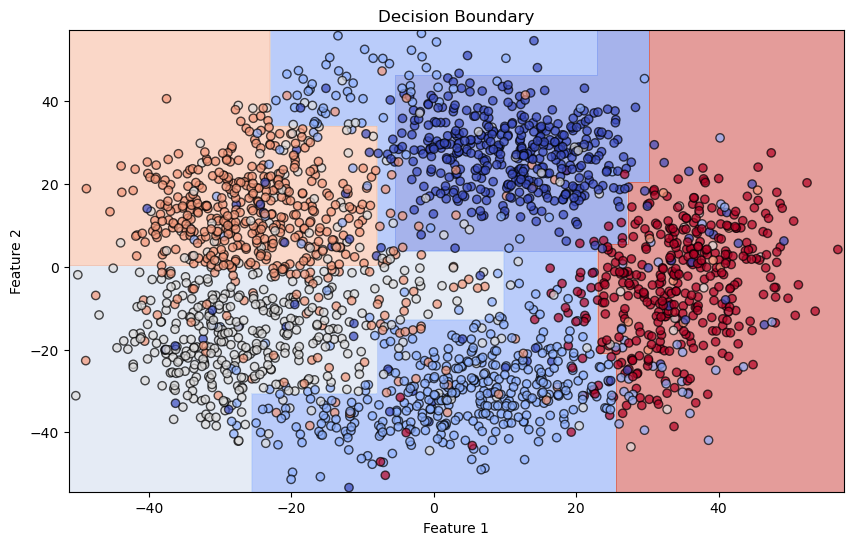

In [11]:
# Plot decision surface for best model
plot_decision_surface(best_tree, Xts, Yts)

In [12]:
# Function to plot decision surface
def plot_decision_surface(clf, X, y, plot_step=0.2, figsize=(12,8)):
    plt.figure(figsize=figsize)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)
    
    # Plot points
    y_pred = clf.predict(X)
    plt.scatter(*X[y_pred == y].T, marker='.', cmap="coolwarm", alpha=0.5, label='Correct')
    plt.scatter(*X[y_pred != y].T, marker='x', cmap="coolwarm", s=50, label='Errors')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    print("Accuracy =", accuracy_score(y, y_pred))
    plt.show()

In [13]:
# 1️⃣ Train a simple decision tree (default parameters)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(Xtr, Ytr)

DecisionTreeClassifier(random_state=42)

Training Performance:


C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred == y].T, marker='.', cmap="coolwarm", alpha=0.5, label='Correct')
C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred != y].T, marker='x', cmap="coolwarm", s=50, label='Errors')


Accuracy = 1.0


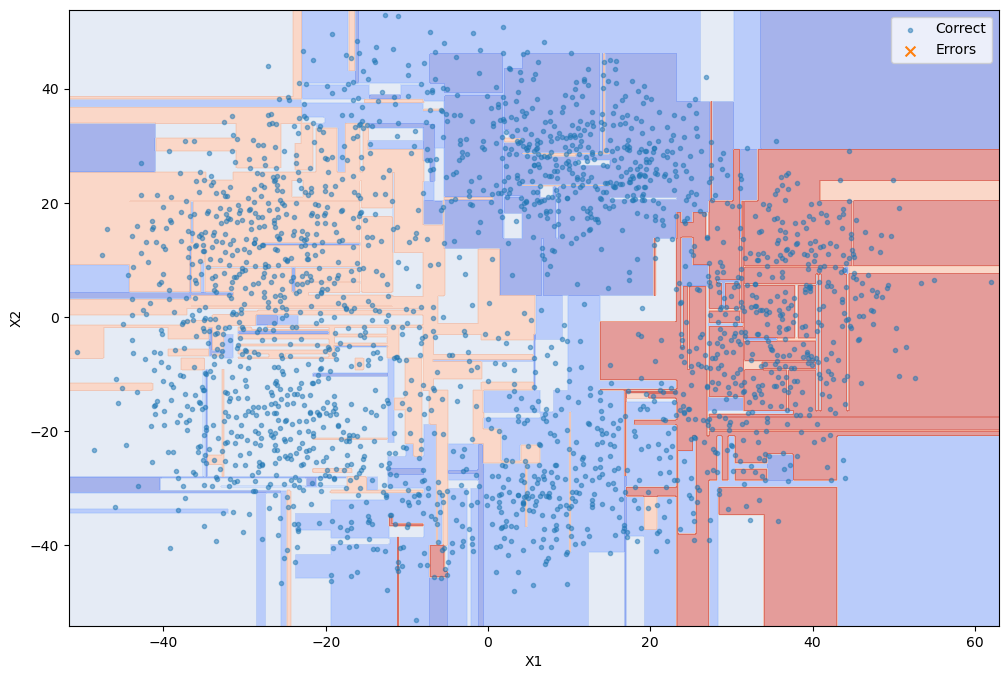

In [14]:
# Overfitting: Training accuracy is too high, validation accuracy is much lower
print("Training Performance:")
plot_decision_surface(tree, Xtr, Ytr)  # Expected: Accuracy = 1.0 (overfitting)

Validation Performance:


C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred == y].T, marker='.', cmap="coolwarm", alpha=0.5, label='Correct')
C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred != y].T, marker='x', cmap="coolwarm", s=50, label='Errors')


Accuracy = 0.7057256990679095


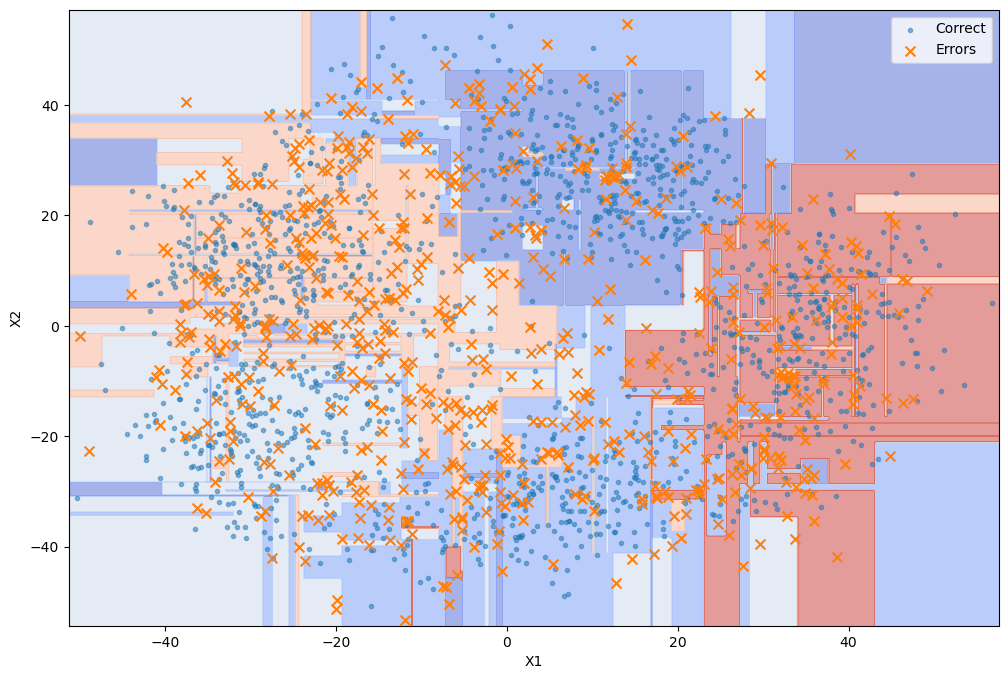

In [15]:
print("Validation Performance:")
plot_decision_surface(tree, Xts, Yts)  # Expected: Accuracy ~ 0.70 (poor generalization)

Tuned Model Training Performance:


C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred == y].T, marker='.', cmap="coolwarm", alpha=0.5, label='Correct')
C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred != y].T, marker='x', cmap="coolwarm", s=50, label='Errors')


Accuracy = 0.8312611012433393


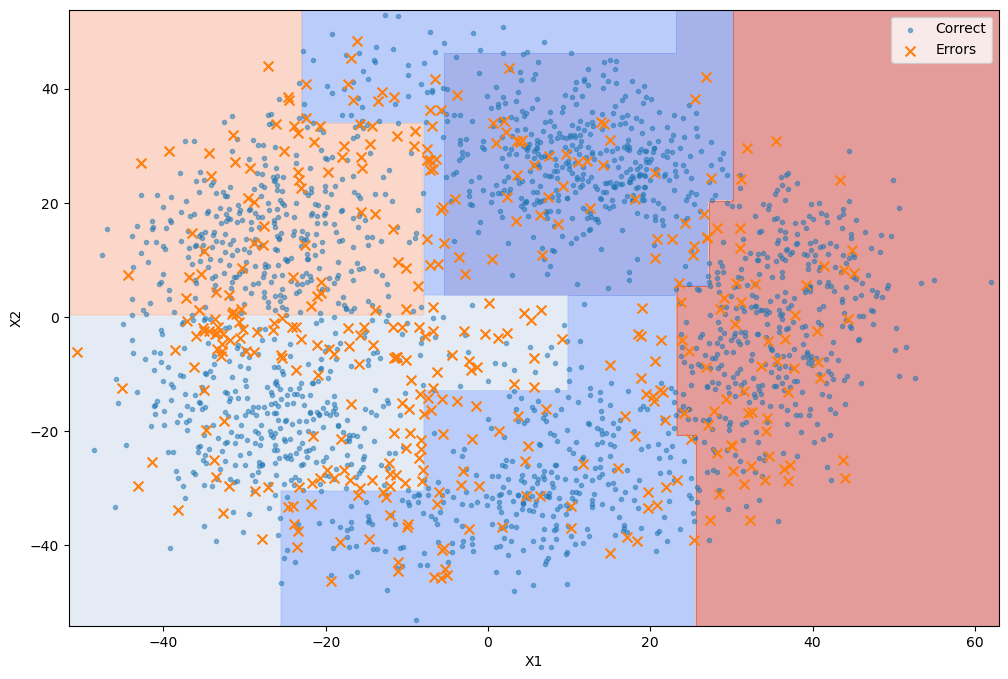

Tuned Model Validation Performance:
Accuracy = 0.7873945849977807


C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred == y].T, marker='.', cmap="coolwarm", alpha=0.5, label='Correct')
C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred != y].T, marker='x', cmap="coolwarm", s=50, label='Errors')


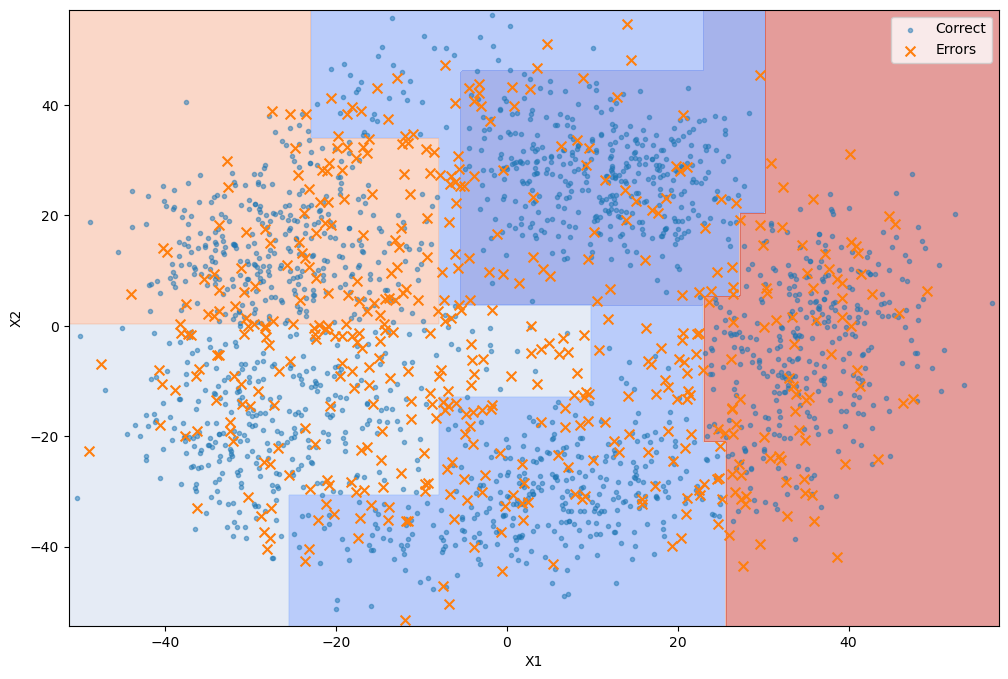

In [16]:
# 2️⃣ Improve the decision tree by tuning hyperparameters
tree_tuned = DecisionTreeClassifier(
    max_depth=5,  # Limit depth to avoid overfitting
    min_samples_split=10,  # Minimum 10 samples to split, prevents deep trees
    min_samples_leaf=5,  # Each leaf should have at least 5 samples
    random_state=42
)

tree_tuned.fit(Xtr, Ytr)

print("Tuned Model Training Performance:")
plot_decision_surface(tree_tuned, Xtr, Ytr)  # Expected: Slightly less than 100%

print("Tuned Model Validation Performance:")
plot_decision_surface(tree_tuned, Xts, Yts)  # Expected: ~0.75-0.80 (improved generalization)


In [17]:
# 3️⃣ Use Grid Search to find the best hyperparameters
param_grid = {
    'max_depth': [3, 5, 10, None],  # Testing different depth limits
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples needed to split
    'min_samples_leaf': [1, 5, 10, 20]  # Minimum samples in each leaf
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtr, Ytr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [18]:
# Best parameters found
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [19]:
# Train final model using best parameters
final_model = grid_search.best_estimator_
final_model.fit(Xtr, Ytr)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

Final Model Training Performance:


C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred == y].T, marker='.', cmap="coolwarm", alpha=0.5, label='Correct')
C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred != y].T, marker='x', cmap="coolwarm", s=50, label='Errors')


Accuracy = 0.8312611012433393


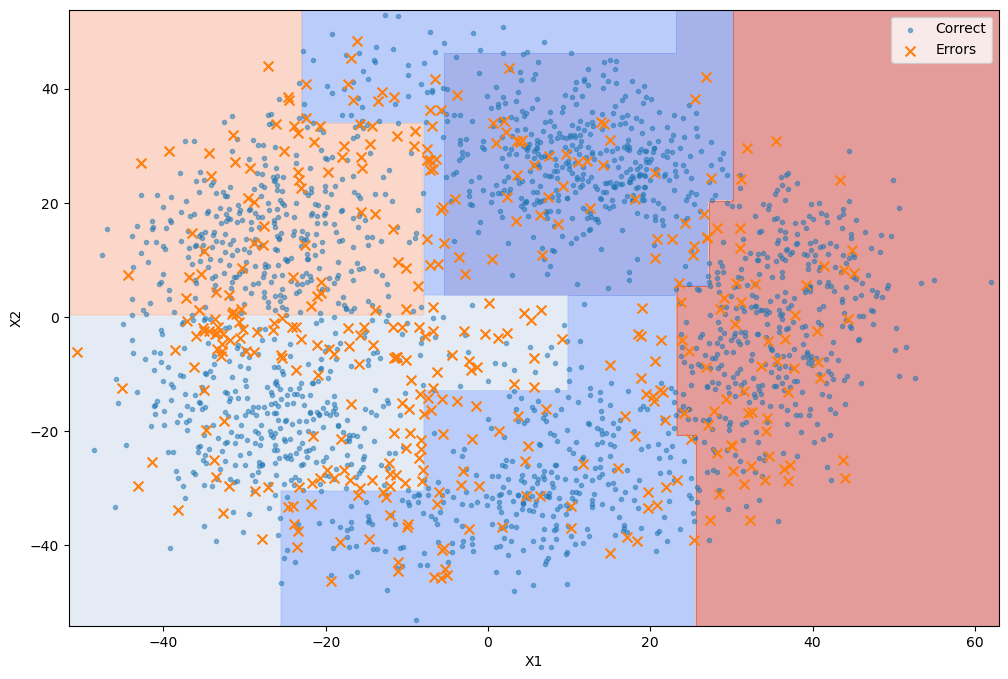

In [20]:
print("Final Model Training Performance:")
plot_decision_surface(final_model, Xtr, Ytr)

Final Model Validation Performance:


C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred == y].T, marker='.', cmap="coolwarm", alpha=0.5, label='Correct')
C:\Users\kotte\AppData\Local\Temp\ipykernel_11864\1187267977.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*X[y_pred != y].T, marker='x', cmap="coolwarm", s=50, label='Errors')


Accuracy = 0.7873945849977807


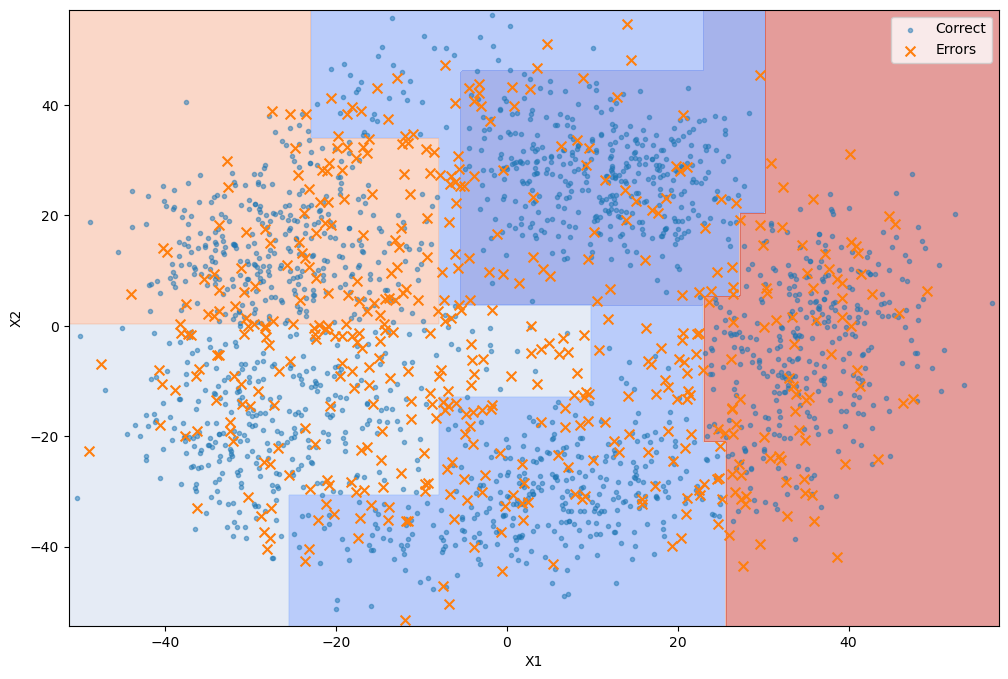

In [21]:
print("Final Model Validation Performance:")
plot_decision_surface(final_model, Xts, Yts)

In [ ]:
A tree has badly overfitted the noizy dataset and as a result it generalized poorly to the validation set.

Your first quest is to fix this issue by tweaking decision tree hyperparameters. A few most helpful ones are provided above the DecisionTreeClassifier definition.

Accuracy >= 0.72 is a start, but you can do better
Accuracy >= 0.75 is better, but still improvable
Accuracy >= 0.78 is a reasonably good result
Accuracy >= 0.8 is either epic skill or luck. Be sure to tell us if you got it!